=== Comparison ===
Traditional Apriori Time: 0.01 seconds
Streaming Apriori Time : 0.16 seconds
Frequent Itemsets (Traditional): 11
Total Frequent Itemsets (Streaming): 4888


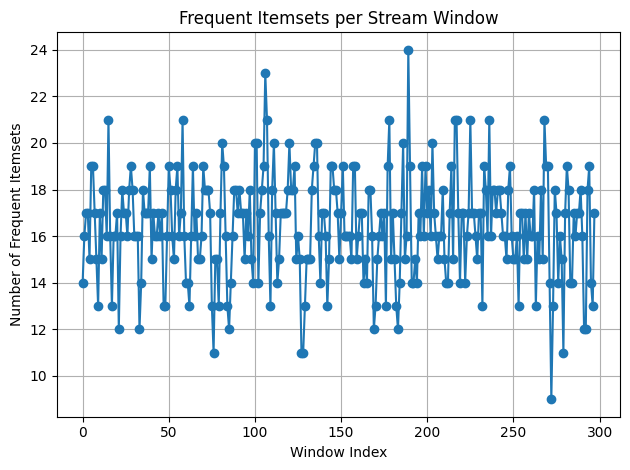

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
import time

# Step 1: Load and prepare the dataset
# Download the dataset from: https://www.kaggle.com/datasets/heeraldedhia/groceries-dataset
data = pd.read_csv("/Users/muskan/deeplearning/bda/Groceries_dataset.csv")  # replace with actual path

# Group transactions by Member_number and Date
transactions = data.groupby(['Member_number', 'Date'])['itemDescription'].apply(list)
transaction_list = transactions.tolist()

# Step 2: Stream-based Apriori using data windowing
def stream_apriori(transactions, window_size=100, min_support=0.05, slide=0):
    """
    Apply Apriori algorithm to data stream using windows.
    slide = 0 means tumbling window. slide > 0 means sliding window.
    """
    stream_frequent_sets = []
    n = len(transactions)
    step = window_size if slide == 0 else slide

    for start in range(0, n - window_size + 1, step):
        window = transactions[start:start + window_size]

        te = TransactionEncoder()
        te_ary = te.fit(window).transform(window)
        df = pd.DataFrame(te_ary, columns=te.columns_)

        freq_itemsets = apriori(df, min_support=min_support, use_colnames=True)
        stream_frequent_sets.append(freq_itemsets)

    return stream_frequent_sets

# Step 3: Traditional Apriori on the entire dataset
def traditional_apriori(transactions, min_support=0.05):
    te = TransactionEncoder()
    te_ary = te.fit(transactions).transform(transactions)
    df = pd.DataFrame(te_ary, columns=te.columns_)

    freq_itemsets = apriori(df, min_support=min_support, use_colnames=True)
    return freq_itemsets

# Step 4: Run and compare both approaches
min_support = 0.05
window_size = 100
slide = 50  # use 0 for tumbling window

# Traditional Apriori
start = time.time()
traditional_itemsets = traditional_apriori(transaction_list, min_support)
traditional_time = time.time() - start

# Stream-based Apriori
start = time.time()
stream_itemsets = stream_apriori(transaction_list, window_size, min_support, slide)
stream_time = time.time() - start

# Step 5: Print comparison
print("=== Comparison ===")
print(f"Traditional Apriori Time: {traditional_time:.2f} seconds")
print(f"Streaming Apriori Time : {stream_time:.2f} seconds")
print(f"Frequent Itemsets (Traditional): {len(traditional_itemsets)}")
total_stream_itemsets = sum(len(fs) for fs in stream_itemsets)
print(f"Total Frequent Itemsets (Streaming): {total_stream_itemsets}")

# Step 6: Visualize number of itemsets per window
stream_counts = [len(fs) for fs in stream_itemsets]
plt.plot(stream_counts, marker='o')
plt.title('Frequent Itemsets per Stream Window')
plt.xlabel('Window Index')
plt.ylabel('Number of Frequent Itemsets')
plt.grid(True)
plt.tight_layout()
plt.show()
